# Notebook for training/testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.io import read_image,ImageReadMode
from torch.utils.data import Dataset
import torchvision.transforms.v2 as transforms
import sys
from PIL import Image
import os

import torch.nn as nn
import torch.optim as optim
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.transforms import v2 as transforms


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cpu')

In [3]:
cdir = !pwd
rc = 'local' if 'dg' in cdir[0] else 'colab'
if rc == 'colab':
    !echo 'COL'
else:
    !echo 'Loc'


Loc


In [4]:
# Colab dir setup and extract
untar = 'nab_bbs'
if rc == 'colab':
    from google.colab import drive
    drive.mount('/content/gdrive/')
    if untar == 'cub':
      !tar -xvf '/content/gdrive/MyDrive/Colab Notebooks/CUB_200_2011.tgz' -C /content | tail
    if untar == 'cub_sm':
      !tar -xvf '/content/gdrive/MyDrive/Colab Notebooks/CUB_sm.tar' -C /content | tail
    if untar == 'cub_bbs':
      !tar -xzvf '/content/gdrive/MyDrive/Colab Notebooks/CUB_200_2011_bbs.tgz' -C /content | tail
    if untar == 'nab_sm':
      !tar -xzvf '/content/gdrive/MyDrive/Colab Notebooks/nabirds_sm.tgz' -C /content | tail
    if untar == 'nab_bbs':
      !tar -xzvf '/content/gdrive/MyDrive/Colab Notebooks/nabirds_bbs.tgz' -C /content | tail
      !tar -xvf '/content/gdrive/MyDrive/Colab Notebooks/CUBtxt.tar' -C /content | tail
    sys.path.append('/content/gdrive/MyDrive')


In [5]:
from pathlib import Path
if rc == 'colab':
    datadir = Path('/content')
    expdir = Path('/content/gdrive/MyDrive/birddb/expts')
    sys.path.append('/content/gdrive/MyDrive/birddb/src')
else:
    datadir = Path('/data1/datasets/birds')
    expdir = Path('/home/dg/proj/birddb/expts')
    sys.path.append('/home/dg/proj/birddb/src')


In [6]:
import birddb
import trainer
import models
import expt

In [7]:

dbname = 'nab_wood_sm'


In [8]:
dbdir = Path(datadir / dbname)
trainds = birddb.TrainImageDataset(dbdir)

testds = birddb.TestImageDataset(dbdir,trainds)


In [9]:
myexpt = expt.Expt_RN50_V1_T2(expdir,datadir,dbname,device)
print(myexpt.dirDict())

{'datadir': PosixPath('/data1/datasets/birds'), 'dbname': 'nab_wood_sm', 'expdir': '/home/dg/proj/birddb/expts/RN50_T1/T2/nab_wood_sm', 'chkpath': '/home/dg/proj/birddb/expts/RN50_T1/T2/nab_wood_sm/check.pt', 'dbdir': PosixPath('/data1/datasets/birds/nab_wood_sm')}


In [10]:

myexpt.trainModel(10)


/home/dg/proj/birddb/expts/RN50_T1/T2/nab_wood_sm/check.pt
Epoch 0: .. Train: Loss:2.641 Acc:0.065
Epoch 1: .. Train: Loss:2.629 Acc:0.110
Epoch 2: .. Train: Loss:2.615 Acc:0.147
Epoch 3: .. Train: Loss:2.601 Acc:0.154
Epoch 4: .. Train: Loss:2.553 Acc:0.175
Epoch 5: .. Train: Loss:2.449 Acc:0.216
Epoch 6: .. Train: Loss:2.186 Acc:0.296
Epoch 7: .. Train: Loss:1.944 Acc:0.319
Epoch 8: .. Train: Loss:1.628 Acc:0.413
Epoch 9: .. Train: Loss:1.371 Acc:0.484


In [ ]:
import pandas as pd
df = pd.read_csv(myexpt.expdir + '/train_acc.csv')
df.plot()

In [ ]:
myexpt.trainModel(25)
df = pd.read_csv(myexpt.expdir + '/train_acc.csv')
df.plot()


/home/dg/proj/birddb/expts/RN50_T1/T2/nab_wood_sm/check.pt
restore to epoch 10
Epoch 10: .. Train: Loss:1.181 Acc:0.557
Epoch 11: .. Train: Loss:1.008 Acc:0.608
Epoch 12: .. Train: Loss:0.894 Acc:0.661
Epoch 13: .. Train: Loss:0.823 Acc:0.698
Epoch 14: .. Train: Loss:0.713 Acc:0.738
Epoch 15: .. Train: Loss:0.709 Acc:0.749
Epoch 16: .. Train: Loss:0.595 Acc:0.773
Epoch 17: .. Train: Loss:0.555 Acc:0.828
Epoch 18: .. Train: Loss:0.495 Acc:0.824
Epoch 19: .. Train: Loss:0.509 Acc:0.831
Epoch 20: .. Train: Loss:0.480 Acc:0.855
Epoch 21: .. Train: Loss:0.367 Acc:0.884
Epoch 22: .. Train: Loss:0.352 Acc:0.891
Epoch 23: .. Train: Loss:0.282 Acc:0.915
Epoch 24: .

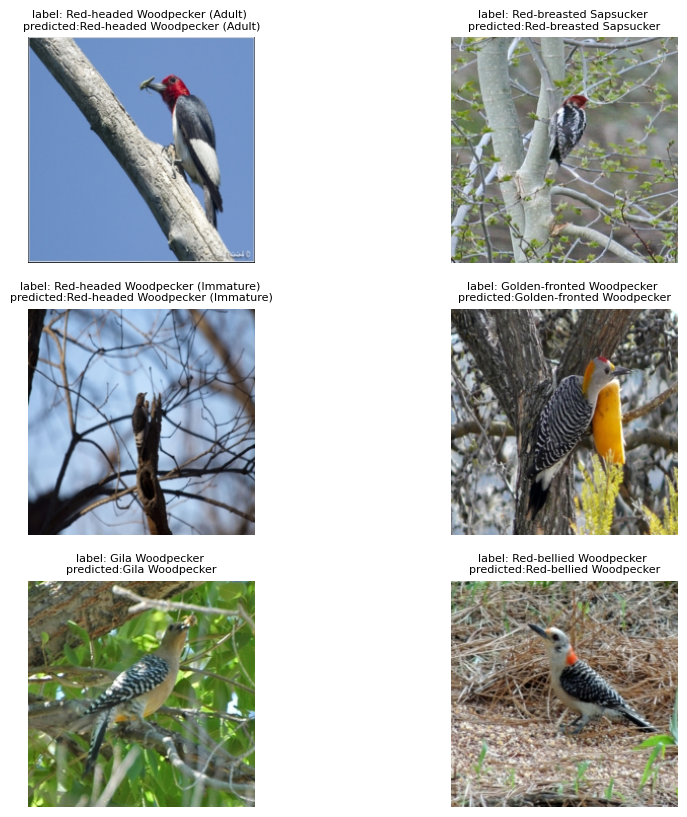

In [13]:
import importlib
importlib.reload(expt)
myexpt = expt.Expt_RN50_V1_T2(expdir,datadir,dbname,device)
model = myexpt.loadModel()
# note - makeDataloader always adds resize transform

myexpt.visualizeOnDataset(trainds)


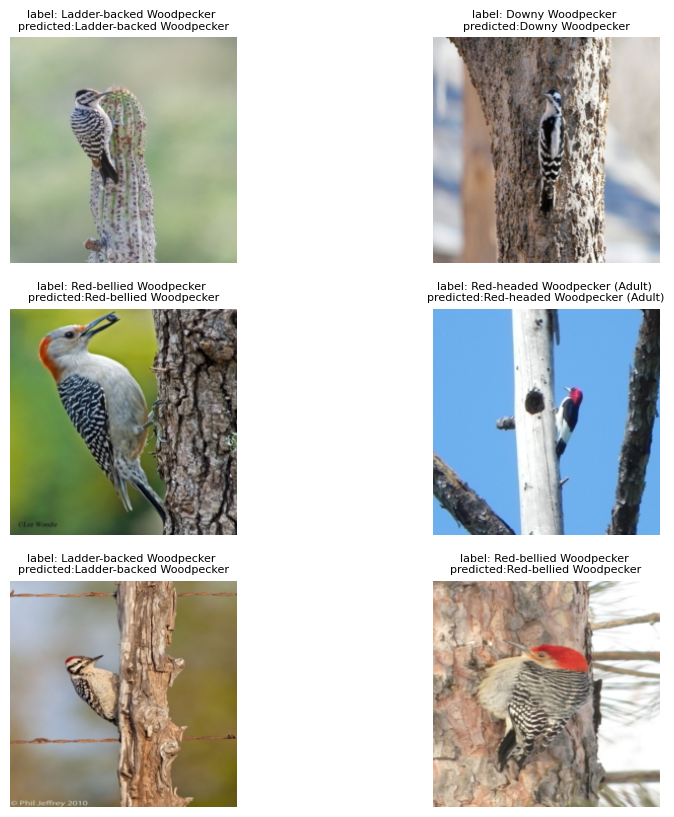

In [14]:
myexpt.visualizeOnDataset(testds)


In [ ]:
myexpt.testOnDataset(testds)


Loss: 1.1462 Acc: 0.7192
Testing complete in 0m 36s


(1.146244947973394, tensor(0.7192, device='cuda:0', dtype=torch.float64))